In [8]:
#### Ethnicity
import pandas as pd
import sqlite3
from contextlib import closing
import psycopg2

nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, param_value, classification, category
            FROM baseline_measurements
            WHERE (title = 'Race (NIH/OMB)' OR title = 'Race/Ethnicity, Customized')
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'number',
        'classification',
        'category',
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_race= extract_aact(nct_id_list)
print(extracted_race)


max_result_group_id = extracted_race.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_race = extracted_race[extracted_race['result_group_id'] == max_result_group_id]

print(filtered_extracted_race)

filtered_extracted_race.loc[filtered_extracted_race['category'].isnull(), 'category'] = filtered_extracted_race['classification']

category_mapping = {
    'Black': 'Black or African American',
    'BLACK OR AFRICAN AMERICAN' : 'Black or African American',
    'Black Or African American' : 'Black or African American',
    'ASIAN' : 'Asian',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native Hawaiian or Other Pacific Islander',
    'Native Hawaiian or Pacific Islander':'Native Hawaiian or Other Pacific Islander',
    'White or Caucasian': 'White',
    'AMERICAN INDIAN OR ALASKA NATIVE': 'American Indian or Alaska Native',
    'American Indian Or Alaska Native': 'American Indian or Alaska Native',
    'WHITE': 'White',
    'Unknown': 'Unknown or Not Reported',
    'Missing': 'Unknown or Not Reported',
    'Other': 'Unknown or Not Reported',
    'OTHER' : 'Unknown or Not Reported',
    'MISSING': 'Unknown or Not Reported',
    'No ethnicity': 'Unknown or Not Reported',
    'Other, not specified': 'Unknown or Not Reported',
    'Multiple': 'Unknown or Not Reported'
}

categories_to_remove = ["HISPANIC OR LATINO", "NOT HISPANIC OR LATINO","NOT KNOWN, NOT RECORDED, OR REFUSED"]

filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)
filtered_extracted_race = filtered_extracted_race[~filtered_extracted_race['category'].isin(categories_to_remove)]
filtered_extracted_race = filtered_extracted_race.drop('classification', axis=1)
# Specify the file name for your CSV
race = "filtered_extracted_race.csv"

# Save the DataFrame to a CSV file
filtered_extracted_race.to_csv(race, index=False)




          nct_id  result_group_id ctgov_group_code number classification  \
0    NCT03167619         74624644            BG000      0           None   
1    NCT03167619         74624645            BG001      0           None   
2    NCT03167619         74624646            BG002      0           None   
3    NCT03167619         74624644            BG000     16           None   
4    NCT03167619         74624645            BG001     18           None   
..           ...              ...              ...    ...            ...   
398  NCT02032823         74616129            BG001      6          OTHER   
399  NCT02032823         74616130            BG002      9          OTHER   
400  NCT02032823         74616128            BG000     10        MISSING   
401  NCT02032823         74616129            BG001      8        MISSING   
402  NCT02032823         74616130            BG002     18        MISSING   

                             category  
0    American Indian or Alaska Native  
1    Am

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_57938/1339105036.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)


In [2]:
num_unique_values = filtered_extracted_race['category'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_race['category'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 11
Unique values in 'category':
['American Indian or Alaska Native' 'Asian'
 'Native Hawaiian or Other Pacific Islander' 'Black or African American'
 'White' 'More than one race' 'Unknown or Not Reported'
 'Ashkenazi Jewish descendant' 'Hispanic or Latino' 'No Ethnicity'
 'Other, Not Specified']


nct_ids in the list but not in the extracted data: {'NCT02034916', 'NCT00679783'}
2 studies no ethnicities

nct_ids in the list but not in the extracted data: {'NCT03343054', 'NCT01818063', 'NCT02734004', 'NCT02657889', 'NCT01905592', 'NCT04690855', 'NCT01506609'}

1st study: Age, customized in title, : <18,18-44, 45-64, >65 in classification
2nd study: Age, categorical in title, , <18, 18-65, >65, in category
3rd study: Age, categorical in title, <18, 18-65, >65, in category
4th study: Age, categorical in title:  as above
5th study: Age, customized: 18-64, 65-74, >75 in category
6th study: Age, categorical in title in category
7t study: Age, customized, <45, 45-64, >65 in category






In [9]:
### Age with custom and categorical
nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_age_extra(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT m.nct_id, m.result_group_id, m.classification, m.category, m.title, m.param_value, b.count, m.dispersion_type, m.dispersion_value
        FROM baseline_measurements m
        LEFT JOIN baseline_counts b on m.result_group_id=b.result_group_id
        WHERE (title = 'Age, Continuous')
        AND m.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});;
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'result_group_id',
        'classification',
        'category',
        'title',
        'number',
        'total_count',
        'dispersion_type',
        'dispersion_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    


extracted_age_extra= extract_aact_age_extra(nct_id_list)
print(extracted_age_extra)


max_result_group_id = extracted_age_extra.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_age_extra = extracted_age_extra[extracted_age_extra['result_group_id'] == max_result_group_id]

# Specify the file name for your CSV
age_extra = "filtered_extracted_age_extra.csv"

# Save the DataFrame to a CSV file
filtered_extracted_age_extra.to_csv(age_extra, index=False)


9
         nct_id  result_group_id classification category            title  \
0   NCT03167619         74624644           None     None  Age, Continuous   
1   NCT01945775         74658553           None     None  Age, Continuous   
2   NCT03330847         74663619           None     None  Age, Continuous   
3   NCT03330847         74663620           None     None  Age, Continuous   
4   NCT02163694         74838551           None     None  Age, Continuous   
5   NCT01116648         75082357           None     None  Age, Continuous   
6   NCT01116648         75082359           None     None  Age, Continuous   
7   NCT01116648         75082361           None     None  Age, Continuous   
8   NCT02282020         74700164           None     None  Age, Continuous   
9   NCT02032823         74616129           None     None  Age, Continuous   
10  NCT02032823         74616130           None     None  Age, Continuous   
11  NCT03167619         74624645           None     None  Age, Continuous 

In [4]:
# Ensure that 'number' and 'total_count' columns are numeric
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')

# Calculate the product
filtered_extracted_age_extra['product'] = filtered_extracted_age_extra['number'] * filtered_extracted_age_extra['total_count']

# Calculate the sum of the product
total_sum = filtered_extracted_age_extra['product'].sum()

# Calculate the sum of 'total_count'
total_participants = filtered_extracted_age_extra['total_count'].sum()

# Calculate the average age
# Check if total_participants is not zero to avoid division by zero
if total_participants != 0:
    average_age = total_sum / total_participants
    print("Average Age:", average_age)
else:
    print("Total number of participants is zero, cannot compute average age.")

Average Age: 47.20263892413092


/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_57938/147986295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_57938/147986295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
/var/folders/64/x7_jk0ds

In [5]:
print(filtered_extracted_age_extra)

         nct_id  result_group_id classification category            title  \
1   NCT01945775         74658553           None     None  Age, Continuous   
4   NCT02163694         74838551           None     None  Age, Continuous   
10  NCT02032823         74616130           None     None  Age, Continuous   
12  NCT03167619         74624646           None     None  Age, Continuous   
15  NCT03330847         74663621           None     None  Age, Continuous   
25  NCT02000622         75157065    Age (years)     None  Age, Continuous   
31  NCT01116648         75082366           None     None  Age, Continuous   
33  NCT02282020         74700165           None     None  Age, Continuous   
43  NCT01306032         75112158           None     None  Age, Continuous   

    number  total_count     dispersion_type dispersion_value  product  
1     48.1          431  Standard Deviation            11.80  20731.1  
4     46.8          509  Standard Deviation            10.75  23821.2  
10    43.3   

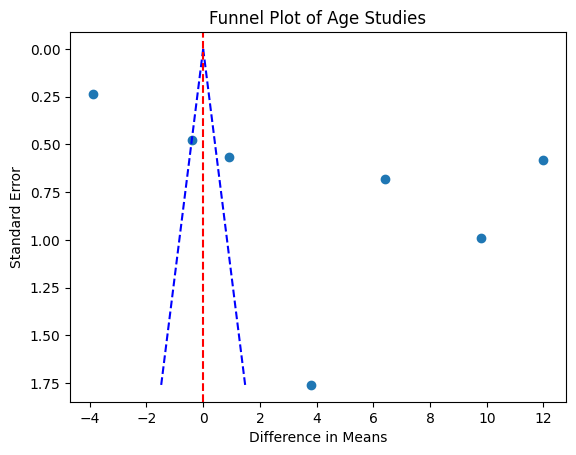

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Convert columns to appropriate types
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
filtered_extracted_age_extra['dispersion_value'] = pd.to_numeric(filtered_extracted_age_extra['dispersion_value'], errors='coerce')

# Filter rows where necessary data is available
filtered_extracted_age_extra = filtered_extracted_age_extra[filtered_extracted_age_extra['dispersion_type'] == 'Standard Deviation']
filtered_extracted_age_extra = filtered_extracted_age_extra.dropna(subset=['number', 'total_count', 'dispersion_value'])

# Calculate difference in means and standard error
overall_mean = 47.2
filtered_extracted_age_extra['difference_in_means'] = filtered_extracted_age_extra['number'] - overall_mean
filtered_extracted_age_extra['standard_error'] = filtered_extracted_age_extra['dispersion_value'] / np.sqrt(filtered_extracted_age_extra['total_count'])

se_mean = filtered_extracted_age_extra['standard_error'].mean()
start_left = -1.96 * se_mean
start_right = 1.96 * se_mean

# Calculate the ending points (where they intersect with the red line)
end_y = 0  # y-coordinate where it meets the red dashed line

# Add the diagonal lines to the plot
plt.plot([start_left, 0], [max(filtered_extracted_age_extra['standard_error']), end_y], color='blue', linestyle='--')
plt.plot([start_right, 0], [max(filtered_extracted_age_extra['standard_error']), end_y], color='blue', linestyle='--')
plt.scatter(filtered_extracted_age_extra['difference_in_means'], filtered_extracted_age_extra['standard_error'])

plt.xlabel('Difference in Means')
plt.ylabel('Standard Error')
plt.title('Funnel Plot of Age Studies')
plt.axvline(x=0, color='red', linestyle='--')
plt.gca().invert_yaxis() # Inverting y-axis for better interpretation of funnel plot
plt.show()

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_57938/1476394245.py:25: RuntimeWarning: divide by zero encountered in divide
  y_values = 1.96 / np.sqrt(x_values)


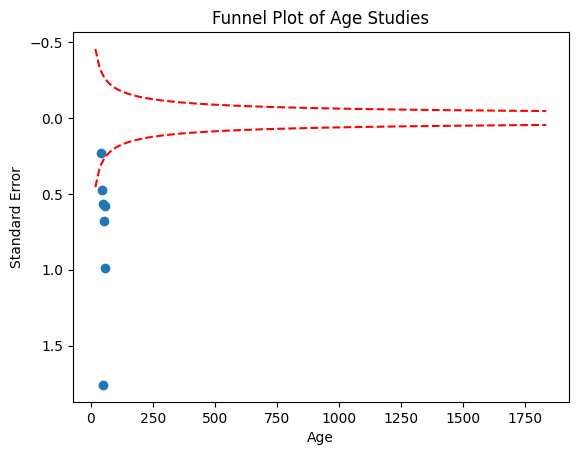

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace this with your actual dataframe)
# filtered_extracted_age_extra = [your_dataframe]

# Convert columns to appropriate types
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
filtered_extracted_age_extra['dispersion_value'] = pd.to_numeric(filtered_extracted_age_extra['dispersion_value'], errors='coerce')

# Filter rows for Standard Deviation and non-nulls
df = filtered_extracted_age_extra[(filtered_extracted_age_extra['dispersion_type'] == 'Standard Deviation') & filtered_extracted_age_extra['number'].notnull() & filtered_extracted_age_extra['total_count'].notnull() & filtered_extracted_age_extra['dispersion_value'].notnull()]

# Calculate standard error for individual studies
df['standard_error'] = df['dispersion_value'] / np.sqrt(df['total_count'])

# Create funnel plot
plt.scatter(df['number'], df['standard_error'])

# Calculate the expected standard error for given sample sizes (total_count)
max_total_count = df['total_count'].max()
x_values = np.linspace(0, max_total_count, 100)
y_values = 1.96 / np.sqrt(x_values)

# Add the expected standard error lines to the plot
plt.plot(x_values, y_values, 'r--')
plt.plot(x_values, -y_values, 'r--')

plt.xlabel('Age')
plt.ylabel('Standard Error')
plt.title('Funnel Plot of Age Studies')
plt.gca().invert_yaxis()  # Invert y-axis
plt.show()

In [ ]:
num_unique_values = filtered_extracted_age_extra['nct_id'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_age_extra['nct_id'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 9
Unique values in 'category':
['NCT01116648' 'NCT01945775' 'NCT02032823' 'NCT01306032' 'NCT03330847'
 'NCT03167619' 'NCT02163694' 'NCT02000622' 'NCT02282020']


In [ ]:
### trial design

nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_design(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT nct_id, allocation, intervention_model, masking, subject_masked, caregiver_masked, investigator_masked, outcomes_assessor_masked
        FROM designs
        WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'allocation',
        'intervention_model',
        'masking',
        'subject_masked',
        'caregiver_masked',
        'investigator_masked',
        'outcomes_assessor_masked'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_designs= extract_aact_design(nct_id_list)
print(extracted_designs)

# Specify the file name for your CSV
designs = "extracted_designs.csv"

# Save the DataFrame to a CSV file
extracted_designs.to_csv(designs, index=False)




12
         nct_id  allocation    intervention_model            masking  \
0   NCT01306032  Randomized  Crossover Assignment  None (Open Label)   
1   NCT02163694  Randomized   Parallel Assignment             Double   
2   NCT02000622  Randomized   Parallel Assignment  None (Open Label)   
3   NCT02032823  Randomized   Parallel Assignment             Triple   
4   NCT03167619  Randomized   Parallel Assignment  None (Open Label)   
5   NCT01818063  Randomized   Parallel Assignment  None (Open Label)   
6   NCT01905592  Randomized   Parallel Assignment  None (Open Label)   
7   NCT02282020  Randomized                  None  None (Open Label)   
8   NCT01116648  Randomized   Parallel Assignment  None (Open Label)   
9   NCT01945775  Randomized   Parallel Assignment  None (Open Label)   
10  NCT01506609  Randomized   Parallel Assignment             Double   
11  NCT03330847  Randomized   Parallel Assignment  None (Open Label)   

   subject_masked caregiver_masked investigator_masked  \
0 

In [ ]:

### interventions

nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_intervention(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT d.nct_id, d.intervention_id, i.name, i.description, de.title
        FROM design_group_interventions d
        LEFT JOIN interventions i on d.intervention_id=i.id
        LEFT JOIN design_groups de on de.id=d.design_group_id
        WHERE d.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'intervention_id',
        'name',
        'description',
        'title'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_intervention= extract_aact_intervention(nct_id_list)
print(extracted_intervention)



# Specify the file name for your CSV
interventions = "extracted_interventions.csv"

# Save the DataFrame to a CSV file
extracted_intervention.to_csv(interventions, index=False)



12
         nct_id  intervention_id                             name  \
0   NCT01818063         73676220                       Paclitaxel   
1   NCT01818063         73676220                       Paclitaxel   
2   NCT01818063         73676221                      Carboplatin   
3   NCT01818063         73676221                      Carboplatin   
4   NCT01818063         73676222                      Doxorubicin   
..          ...              ...                              ...   
57  NCT02163694         73643611                      Carboplatin   
58  NCT02163694         73643612                       Paclitaxel   
59  NCT02163694         73643612                       Paclitaxel   
60  NCT02000622         74000274                         Olaparib   
61  NCT02000622         74000275  Physician's choice chemotherapy   

                                          description  \
0                                            Given IV   
1                                            Given IV 

In [ ]:
#### sex


nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_sex(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, category,title, param_value
            FROM baseline_measurements
            WHERE (title ='Sex: Female, Male' )
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'category',
        'title',
        'param_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_sex= extract_aact_sex(nct_id_list)
#print(extracted_race)


max_result_group_id = extracted_sex.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_sex = extracted_sex[extracted_sex['result_group_id'] == max_result_group_id]



# Specify the file name for your CSV
sex = "filtered_extracted_sex.csv"

# Save the DataFrame to a CSV file
filtered_extracted_sex.to_csv(sex, index=False)



In [ ]:
#### outcomes


nct_id_list = ['NCT01306032', 'NCT02163694', 'NCT02282020', 'NCT02000622', 'NCT02032823', 
               'NCT03167619', 'NCT01818063', 'NCT01905592', 'NCT01116648', 'NCT01945775', 
               'NCT01506609', 'NCT03330847']

def extract_aact_outcomes(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, outcome_type, measure
            FROM design_outcomes
            WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])}) ;
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'outcome_type',
        'measure'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)

extracted_outcomes= extract_aact_outcomes(nct_id_list)
    
print(extracted_outcomes)

          nct_id outcome_type  \
0    NCT01945775      primary   
1    NCT01945775    secondary   
2    NCT01945775    secondary   
3    NCT01945775    secondary   
4    NCT01945775    secondary   
..           ...          ...   
110  NCT02000622        other   
111  NCT02000622        other   
112  NCT01818063      primary   
113  NCT01818063    secondary   
114  NCT01818063    secondary   

                                               measure  
0    Progression-Free Survival (PFS): Independent R...  
1    Percentage of Participants With Objective Resp...  
2                                Overall Survival (OS)  
3             Trough Plasma Talazoparib Concentrations  
4    Number of Participants With Treatment-emergent...  
..                                                 ...  
110  Time to First Subsequent Cancer Therapy or Dea...  
111  Time to Second Subsequent Cancer Therapy or De...  
112  Count of Participants That Achieve Pathologic ...  
113                          Over